## Generate dataset

In [1]:
# import cv2
# import csv
# import glob

# header =["label"]
# for i in range(0,784):
#     header.append("pixel"+str(i))
# with open('dataset.csv', 'a') as f:
#     writer = csv.writer(f)
#     writer.writerow(header)


# for label in range(10):
#     dirList = glob.glob("captured_images/"+str(label)+"/*.png")
#     for img_path in dirList:
#         im = cv2.imread(img_path)
#         im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#         im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
#         roi = cv2.resize(im_gray, (28, 28), interpolation=cv2.INTER_AREA)

#         data=[]
#         data.append(label)
#         rows,cols = roi.shape

#         # #Add pixel one-by-one into data Array.
#         for i in range(rows):
#             for j in range(cols):
#                 k = roi[i,j]
#                 if k>100:
#                     k=1
#                 else:
#                     k=0
#                 data.append(k)


#         with open('dataset.csv', 'a') as f:
#             writer = csv.writer(f)
#             writer.writerow(data)




## Load the dataset

In [2]:
import pandas as pd
from sklearn.utils import shuffle
data = pd.read_csv('dataset.csv')
data = shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
370,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
868,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
598,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
683,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
802,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Separating dependent and independent variable

In [3]:
X = data.drop(["label"],axis = 1)
Y = data["label"]

## Preview of any one image using matplotlib

e:\ds and ml\test\scripts\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


0


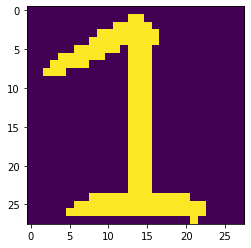

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 40
img = X.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(img)
print(Y[idx])

## Train-Test-Split

In [5]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2)

## Fit the model using SVC and also save the model using joblib

In [6]:
import joblib
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 6)
classifier.fit(train_x, train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

## calculate accuracy

In [7]:
from sklearn import metrics
prediction = classifier.predict(test_x)
print("Accuracy = ",metrics.accuracy_score(prediction, test_y))

Accuracy =  0.98


## Live prediction

In [11]:
# import joblib
# import cv2
# import numpy as np
# import time
# import pyscreenshot as ImageGrab
# model = joblib.load("model/digit_recognizer")
# images_folder = "img/"

# for i in range(20):
#     img = ImageGrab.grab(bbox=(60, 170, 400, 550)) # X1,Y1,X2,Y2
#     img.save(images_folder+"img.png")
#     im = cv2.imread(images_folder+"img.png")

#     im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#     im_gray = cv2.GaussianBlur(im_gray, (15,15), 0)

#     # Threshold the image
#     ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
#     roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)

#     rows,cols = roi.shape

#     X=[]

#     # #Add pixel one-by-one into data Array.
#     for i in range(rows):
#         for j in range(cols):
#             k = roi[i,j]
#             if k>100:
#                 k=1
#             else: 
#                 k=0
#             X.append(k)
   
#     predictions = model.predict([X])      
#     print ("Prediction: ", predictions[0])
#     cv2.putText(im, "Prediction is: "+str(predictions[0]), (20, 20), 0, 0.8, (0, 255, 0), 2, cv2.LINE_AA)

#     cv2.startWindowThread()
#     cv2.namedWindow("Result")
#     cv2.imshow("Result", im)
#     cv2.waitKey(10000)
#     time.sleep(2)

Prediction:  4
Prediction:  5
Prediction:  6
Prediction:  7
Prediction:  8
Prediction:  9
Prediction:  0
Prediction:  1
Prediction:  2
Prediction:  3


KeyboardInterrupt: 

## Screen capture

In [9]:
# import pyscreenshot as ImageGrab
# import time

# images_folder = "captured_images/9/"

# for i in range (51,100):
#     time.sleep(8)
#     im = ImageGrab.grab(bbox=(60, 170, 400, 550)) # X1,Y1,X2,Y2
#     print ("saved....",i)
#     im.save(images_folder+str(i)+'.png')
#     print ("clear screen now and redraw now...")

In [10]:
#Rough:
#430*560